Wellcome
Please Run the first Cell first for Ipmorting Functions and then Import your Data in Second Cell to train the model. 

In [1]:


def train (X_Train, t_Train, D = 150): 
    
    #Import libraries
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.style.use('bmh')

    import tensorflow as tf
    from tensorflow import keras
    from sklearn.model_selection import train_test_split
    from keras.layers import Dropout
    from keras.layers import Dense
    from keras.regularizers import l2
    from sklearn.metrics import classification_report



    
    #Reshap
    
    X_Train.shape, t_Train.shape
    from skimage.transform import resize
    X_train_reshape = []

    
    for i in range(len(X_Train)):
        X_train_reshape.append(resize((X_Train[i].reshape(300,300,3)),(D,D,3)))
    X_train_reshape = np.asanyarray(X_train_reshape)
    del X_Train
    
    
    #Correct misslable
    corrected_labels_train = t_Train.copy()
    changes = {
        0: [2400, 361, 2439, 1865, 2671, 893, 3625],
        1: [1288, 3033, 3037, 3599, 780, 3140, 3372],
        2: [1670, 673, 1995, 2804, 2769, 2714, 653],
        3: [2980, 2937, 603, 1819, 3704, 2025],
        4: [2665, 1649, 1777, 1563, 2986],
        5: [1587, 2750, 2763, 1917],
        6: [2015, 2388, 38, 401, 2818, 1875, 3675],
        7: [3154, 744, 452, 3283, 3412, 313],
        8: [556, 1213, 3253],
        9: [2940, 1314, 1108, 708, 3277, 728],
    }
    for new_label, indices_to_change in changes.items():
        for index in indices_to_change:
            corrected_labels_train[index] = new_label

    t_Train = corrected_labels_train
    
    # Training and Test sets
    X_training, X_test, t_training, t_test = train_test_split(X_train_reshape, 
                                                      t_Train, 
                                                      shuffle=True,
                                                      stratify=t_Train,
                                                      test_size=0.15)
    # Train and validation sets
    X_train, X_val, t_train, t_val = train_test_split(X_training, 
                                                      t_training, 
                                                      shuffle=True,
                                                      stratify=t_training,
                                                      test_size=0.2)

    
    
    
    class_names = ['Nike',
                    'Adidas',
                    'Ford',
                    'Honda',
                    'General Mills',
                    'Unilever',
                    "McDonald's",
                    'KFC',
                    'Gators',
                    '3M']
    
    #define function for ploting
    def plot_history(history):
        # Plot training & validation accuracy
        plt.figure()
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training & validation loss
        plt.figure()
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()
    #define training the model
    def trainfit(X_train, t_train, X_val, t_val, X_test, t_test, class_names):
        base_model = keras.applications.ResNet50V2(weights='imagenet',
                                                input_shape=(150, 150, 3), 
                                                include_top=False)
        base_model.trainable = False

        inputs = keras.Input(shape=(150, 150, 3))
        x = base_model(inputs, training=False)
        x_pooling = keras.layers.GlobalAveragePooling2D()(x)
        x_dropout = Dropout(0.3)(x_pooling)
        outputs = Dense(10, activation='softmax', kernel_regularizer=l2(0.001))(x_dropout)

        model = keras.Model(inputs, outputs)

        for layer in base_model.layers[-5:]:
            layer.trainable = True

        model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.0001),
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

        history=model.fit(X_train,t_train, epochs=250, batch_size=32,
              validation_data=(X_val, t_val),
              callbacks=[tf.keras.callbacks.EarlyStopping(patience=30)])

        y_test = np.argmax(model.predict(X_test), axis=1)
        print(classification_report(t_test, y_test, target_names=class_names))

        plot_history(history)

        train_loss, train_accuracy = model.evaluate(X_train, t_train)
        print(f"Training accuracy: {train_accuracy * 100:.2f}%")

        val_loss, val_accuracy = model.evaluate(X_val, t_val)
        print(f"Validation accuracy: {val_accuracy * 100:.2f}%")
        model.save("ECE_saved_model.md")
        
    trainfit (X_train, t_train, X_val, t_val, X_test, t_test, class_names)

    
import numpy as np  

2023-04-26 00:05:44.036873: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 00:05:44.578453: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79111 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:07:00.0, compute capability: 8.0


Epoch 1/250


2023-04-26 00:05:49.392532: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2023-04-26 00:05:50.494811: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Running ptxas --version returned 32512
2023-04-26 00:05:50.702897: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: ptxas exited with non-zero error code 32512, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


16/79 [=====>........................] - ETA: 0s - loss: 3.2124 - accuracy: 0.1836

2023-04-26 00:05:51.769234: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


79/79 [==============================] - 7s 31ms/step - loss: 2.8098 - accuracy: 0.1979 - val_loss: 2.0209 - val_accuracy: 0.3212
Epoch 2/250
79/79 [==============================] - 1s 14ms/step - loss: 2.0075 - accuracy: 0.3609 - val_loss: 1.4548 - val_accuracy: 0.5475
Epoch 3/250
79/79 [==============================] - 1s 15ms/step - loss: 1.5532 - accuracy: 0.4958 - val_loss: 1.1605 - val_accuracy: 0.6472
Epoch 4/250
79/79 [==============================] - 1s 15ms/step - loss: 1.2959 - accuracy: 0.5928 - val_loss: 0.9889 - val_accuracy: 0.7041
Epoch 5/250
79/79 [==============================] - 1s 14ms/step - loss: 1.1318 - accuracy: 0.6446 - val_loss: 0.8795 - val_accuracy: 0.7358
Epoch 6/250
79/79 [==============================] - 1s 15ms/step - loss: 0.9811 - accuracy: 0.6901 - val_loss: 0.7987 - val_accuracy: 0.7611
Epoch 7/250
79/79 [==============================] - 1s 14ms/step - loss: 0.9178 - accuracy: 0.7091 - val_loss: 0.7406 - val_accuracy: 0.7816
Epoch 8/250
79/79 

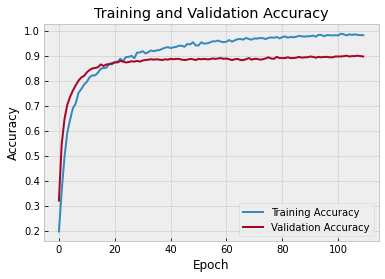

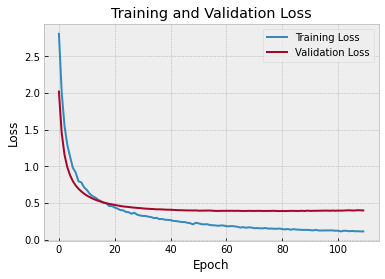

79/79 [==============================] - 1s 11ms/step - loss: 0.0776 - accuracy: 0.9980
Training accuracy: 99.80%
20/20 [==============================] - 0s 11ms/step - loss: 0.4001 - accuracy: 0.8972
Validation accuracy: 89.72%


2023-04-26 00:08:08.607712: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ECE_saved_model.md/assets


/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [2]:
X_train_full = np.load('data_train.npy').T
t_train_full = np.load('labels_train.npy')

train(X_train_full, t_train_full)